In [ ]:
import jupyterthemes as jt
from jupyterthemes.stylefx import set_nb_theme

set_nb_theme('chesterish')

In [207]:
#load libraries 
import time,os
from matplotlib.offsetbox import AnchoredText
import sys,pandas as pd, matplotlib , matplotlib.pyplot as plt, matplotlib.lines , numpy as np,cupy as cp, math, pylab
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
#import cudf
#import ROOT
#from ROOT import TFile

#import root_pandas

#from toggle_cell import hide_cell 
import uproot3
%matplotlib inline

#presets for plot style
from scipy.constants import golden
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (7, 7/golden),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

viridis = cm.get_cmap('viridis', 12)
inferno = cm.get_cmap('inferno', 12)
autumn = cm.get_cmap('autumn', 12)

#physical_devices = tf.config.list_physical_devices('GPU')
#tf.config.experimental.set_memory_growth(physical_devices[0], True)
#tf.config.experimental.set_memory_growth(physical_devices[1], True)
rc = plt.rc
rc('text', usetex=False)
import matplotlib as mpl
rc('font', family='serif')
rc('text', usetex=False)
rc('font', size=15)
rc('xtick', labelsize=15)
rc('ytick', labelsize=15)
rc('legend', fontsize=15)

plt.rcParams['figure.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'
plt.rcParams['savefig.bbox']='tight'

import root_pandas,glob

import gc

def read_n(pattern, n):
    if not '*' in pattern:
        a = root_pandas.read_root(pattern,chunksize=int(n))
    else:
        a = root_pandas.read_root(glob.glob(pattern),chunksize=int(n))
    for b in a:
        del a
        print(n)
        return b

from scipy.optimize import curve_fit

image_dir='images'

import misc_util,correlation_plots

import R2h_module
import imp
imp.reload(R2h_module)

<module 'R2h_module' from '/home/sebouh/di-hadron/R2h_module.py'>

In [123]:
directory = "."
dfs_data = {a : root_pandas.read_root(f"{directory}/Data_Pairs_%s.root" %a.replace("D_",""),a) for a in "D_C C D_Fe Fe Pb D_Pb".split()}

print(dfs_data["D_C"].columns)
dfs_trigger = {a : root_pandas.read_root(f"{directory}/Data_Pairs_%s.root" %a.replace("D_",""),a+"_trigger") for a in "D_C C D_Fe Fe Pb D_Pb".split()}



Index(['dphi', 'dphi_lab', 'drap', 'h1_z', 'h2_z', 'h1_cm_pt', 'h2_cm_pt',
       'h1_xf', 'h2_xf', 'h1_rap', 'ycm', 'h2_rap', 'h1_pid', 'h2_pid',
       'h1_cm_ph', 'h2_cm_ph', 'h1_cm_th', 'h2_cm_th', 'pair_mass', 'pair_pt',
       'mx_eh1h2x', 'mx_eh1x', 'mx_eh2x', 't', 'Q2', 'nu', 'W', 'e_px', 'e_py',
       'e_pz', 'e_p', 'e_ph', 'e_th', 'SampFracEl25', 'SampFracEl20',
       'TargTypeSM', 'TargType', 'x', 'u', 'h1_ph', 'h1_th', 'h2_ph', 'h2_th',
       'h1_deltaZ', 'h2_deltaZ', 'h1_Nphe', 'h2_Nphe', 'h1_Sector',
       'h2_Sector', 'h1_FidCut', 'h2_FidCut', 'h1_FidCutPiPlus',
       'h2_FidCutPiPlus', 'h1_Chi2CC', 'h2_Chi2CC', 'h1_StatCC', 'h2_StatCC',
       'h1_Betta', 'h2_Betta', 'h1_T4', 'h2_T4', 'evnt', 'run'],
      dtype='object')


In [124]:
#get GiBUU
import uproot

def getdatainChunks(filename,treename):
    dataframe =pd.DataFrame()
    file = uproot.open(filename) 
    tree=file[treename]
    df=tree.arrays(filter_name='*',library='pd')
    return df

pathGIBUU="./"
for target in ['D','C','Fe','Pb']:
    #GiBUU
    print (target)
    print (' trigger')
    dfs_trigger['GiBUU_%s'%target]= getdatainChunks('%sGiBUU_Pairs_%s.root'%(pathGIBUU,target), 
                                                           '%s_trigger'%target)
    print (' pairs')
    dfs_data['GiBUU_%s'%target]= getdatainChunks('%sGiBUU_Pairs_%s.root'%(pathGIBUU,target), target)
print (dfs_trigger.keys())

D
 trigger
 pairs
C
 trigger
 pairs
Fe
 trigger
 pairs
Pb
 trigger
 pairs
dict_keys(['D_C', 'C', 'D_Fe', 'Fe', 'Pb', 'D_Pb', 'GiBUU_D', 'GiBUU_C', 'GiBUU_Fe', 'GiBUU_Pb'])


In [125]:
print(set(dfs_data['GiBUU_C'].h2_pid))

{211, 2212, -211}


In [126]:

#now load MC
#dfs_data.update({"MC_"+ a : root_pandas.read_root("/home/seba/CreatePairTuples/MC_Pairs_%s.root" %a,a) for a in "Pb D C Fe".split()})




In [127]:
#dfs_trigger.update({"MC_"+ a : root_pandas.read_root("/home/seba/CreatePairTuples/MC_Pairs_%s.root" %a,a + "_trigger") for a in "Pb D C Fe".split()})



In [128]:
for dct in dfs_data, dfs_trigger:
    dct['D'] = pd.concat([dct['D_'+a] for a in 'C Fe Pb'.split()])
    print(dct.keys())

dict_keys(['D_C', 'C', 'D_Fe', 'Fe', 'Pb', 'D_Pb', 'GiBUU_D', 'GiBUU_C', 'GiBUU_Fe', 'GiBUU_Pb', 'D'])
dict_keys(['D_C', 'C', 'D_Fe', 'Fe', 'Pb', 'D_Pb', 'GiBUU_D', 'GiBUU_C', 'GiBUU_Fe', 'GiBUU_Pb', 'D'])


In [129]:
for df in dfs_data.values():
    if 'h1_FidCutPiPlus' not in df.columns:
        df['h1_FidCutPiPlus'] = [1]*len(df)
        df['h2_FidCutPiPlus'] = [1]*len(df)
for df in dfs_trigger.values():
    if 'h1_FidCutPiPlus' not in df.columns:
        df['h1_FidCutPiPlus'] = [1]*len(df)

In [130]:
import R2h_module
import imp
imp.reload(R2h_module)
for key in list(dfs_data.keys()):
    isMC=False
    if 'GiBUU' in key:
        isMC=True
    
    if '_2pi' in key or '_pi_p' in key:
        continue
    print(f"\n\n{key}")
    
    
    data_trigger_cuts = dfs_data[key]#R2h_module.applyCuts(dfs_data[key],nomCuts=True)
    
    #print(mixed_trigger_cuts)
    dfs_data[key + '_2pi'] = R2h_module.applyCutsPair(data_trigger_cuts,isMC=isMC,
                                                             nomCuts=True,h2Proton=False, minPt=np.sqrt(0.005))
    dfs_data[key + '_pi_p'] = R2h_module.applyCutsPair(data_trigger_cuts,isMC=isMC,
                                                             nomCuts=True,h2Proton=True, minPt=np.sqrt(0.005))
    dfs_trigger[key] = R2h_module.applyCuts(dfs_trigger[key],name='default',isMC=isMC,isTrigger=True,
                                 nomCuts=True, minPt=np.sqrt(0.005))
    
    #for df in (dfs_data[key + '_2pi'],dfs_data[key + '_pi_p']):
    #    df.eval('diff_rap_cm=0.5*log((h1_e+sqrt(h1_p**2-h1_cm_pt**2))/(h1_e-sqrt(h1_p**2-h1_cm_pt**2)))-0.5*log((h2_e+sqrt(h2_p**2-h2_cm_pt**2))/(h2_e-sqrt(h2_p**2-h2_cm_pt**2)))',inplace=True)
    #    df.eval('diff_phi_cm = h1_cm_ph-h2_cm_ph', inplace=True)
    #    df.eval(f'diff_phi_cm = diff_phi_cm-{2*np.pi}*(diff_phi_cm>{np.pi})', inplace=True)
    #    df.eval(f'diff_phi_cm = diff_phi_cm+{2*np.pi}*(diff_phi_cm<{-np.pi})', inplace=True)



D_C
Starting election on dipion variables
This is Data
1.0< Q2 <4.0 1456232  (100.00  %)
2.2 < nu < 4.2 1433772  (98.46  %)
secondary hadrons are pions 1177886  (82.15  %)
(h1_p+h2_p)/nu<1.0 1042162  (88.48  %)
(h1_pid*h2_pid)<0, opposite charge pions 503306  (48.29  %)
kinematic limits for h2_z 495163  (98.38  %)
kinematic limits for dphi 494693  (99.91  %)
kinematic limits for pair_mass 462961  (93.59  %)
leading hadrons are pions 144176  (31.14  %)
0.2<h2_p<5.0 144176  (100.00  %)
0.2<h1_p<5.0 144176  (100.00  %)
pt>0.07071067811865475 GeV 140163  (97.22  %)
25 degree separation between pion and electron.  This is a dumb cut 140163  (100.00  %)
10<h2_th 140163  (100.00  %)
Theta/P fiducial region selected for secondary hadron 140163  (100.00  %)
10< h1_th 140163  (100.00  %)
Theta/P fiducial region selected for trigger hadron 140163  (100.00  %)
Nom cuts for the pair applied (pi pi) 50300  (35.89  %)
Starting election on dipion variables
This is Data
1.0< Q2 <4.0 1456232  (100.00 

1.0< Q2 <4.0 1220015  (100.00  %)
2.2 < nu < 4.2 1205719  (98.83  %)
secondary hadrons are pions 543978  (45.12  %)
(h1_p+h2_p)/nu<1.0 513431  (94.38  %)
(h1_pid*h2_pid)<0, opposite charge pions 234678  (45.71  %)
kinematic limits for h2_z 231448  (98.62  %)
kinematic limits for dphi 231276  (99.93  %)
kinematic limits for pair_mass 212901  (92.05  %)
leading hadrons are pions 34710  (16.30  %)
0.2<h2_p<5.0 34710  (100.00  %)
0.2<h1_p<5.0 34710  (100.00  %)
pt>0.07071067811865475 GeV 33806  (97.40  %)
25 degree separation between pion and electron.  This is a dumb cut 33806  (100.00  %)
10<h2_th 33806  (100.00  %)
Theta/P fiducial region selected for secondary hadron 33806  (100.00  %)
10< h1_th 33806  (100.00  %)
Theta/P fiducial region selected for trigger hadron 33806  (100.00  %)
Nom cuts for the pair applied (pi pi) 10792  (31.92  %)
Starting election on dipion variables
This is Data
1.0< Q2 <4.0 1220015  (100.00  %)
2.2 < nu < 4.2 1205719  (98.83  %)
secondary hadrons are protons

2.2 < nu < 4.2 1095698  (95.46  %)
secondary hadrons are protons 501592  (45.78  %)
leading hadrons are pions 501592  (100.00  %)
0.2<h2_p<5.0 501592  (100.00  %)
0.2<h1_p<5.0 501592  (100.00  %)
pt>0.07071067811865475 GeV 483496  (96.39  %)
Entries before cut  999262
Q2>1.0 and Q2<4.0 998733  (99.95  %)
0.2<h1_p<5.0  998733  (100.00  %)
inelasticity < 0.85 998733  (100.00  %)
h1_pid = pions (trigger) 998733  (100.00  %)
2.2 < nu <4.2 961024  (96.22  %)
pt>0.07071067811865475 GeV 941688  (97.99  %)


D
Starting election on dipion variables
This is Data
1.0< Q2 <4.0 5780313  (100.00  %)
2.2 < nu < 4.2 5696429  (98.55  %)
secondary hadrons are pions 4676367  (82.09  %)
(h1_p+h2_p)/nu<1.0 4127799  (88.27  %)
(h1_pid*h2_pid)<0, opposite charge pions 1990465  (48.22  %)
kinematic limits for h2_z 1957809  (98.36  %)
kinematic limits for dphi 1955986  (99.91  %)
kinematic limits for pair_mass 1832282  (93.68  %)
leading hadrons are pions 572222  (31.23  %)
0.2<h2_p<5.0 572222  (100.00  %)
0.2

In [356]:
dfs_mc= {f"{a}_2pi":root_pandas.read_root(f"/home/sebouh/CreatePairTuples/MC_Pairs_weighted_{a}.root",a) for a in "C Fe Pb".split()}
dfs_mc["D_2pi"] = root_pandas.read_root(f"/home/sebouh/CreatePairTuples/MC_Pairs_weighted_C.root","D_C")

In [132]:
#binning info
yrange_dfdy =(0,3)
bins_dfdy = (6,8)
#yrange_dfdy =(-0,3.5)
#bins_dfdy = (7,8)

In [ ]:
for a in 'D C Fe Pb'.split():
    for x in "Q2 nu nu/5.014 W".split():
        print(a, x, "%.2f"%np.mean(dfs_data[a+"_2pi"].eval(x)))

0.0009524141744967201 [31683 65768 47015 28810 15060  7099  3287  1127] [31933 65709 46956 28744 15013  7094  3280  1120]
0.0031448023150042023 [5638 9813 7135 4365 2230 1160  527  214] [5776 9766 7104 4349 2196 1147  532  211]
0.008154797625316764 [5737 9911 7063 4484 2358 1111  535  227] [6085 9774 7001 4433 2303 1071  532  226]
0.016607155654313623 [1946 3438 2481 1505  780  389  172   81] [2185 3332 2430 1483  743  378  165   75]


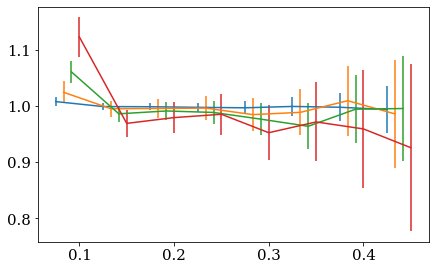

In [28]:
bins=np.linspace(0.05, 0.45, 9)
kee=1.43996 # coulomb constant * elementary charge in MeV fm
R0=1.2 # approximateradius of nucleus/N^(1/3) in fm
for i,(a, Z, N) in enumerate(zip('D C Fe Pb'.split(), (1, 6, 26,82), (2,12,56,208))):
    df = dfs_data[f'{a}_2pi']
    y1,xedges = np.histogram(df.eval("h2_z"),bins=bins)
    deltaE=0.001*kee*Z/(N**(1/3)*R0)
    y2,xedges = np.histogram(df.eval(f"h2_z+((h2_pid>1)*2-1)*{deltaE}/nu"),bins=bins)
    print(deltaE,y1, y2)
    x=(xedges[1:]+xedges[:-1])/2
    plt.errorbar(x+i/120,y2/y1, y2/y1*np.sqrt(1/y1+1/y2))

In [52]:
dfs_data['GiBUU_C'].columns

Index(['dphi', 'dphi_lab', 'qt', 'drap', 'h1_z', 'h2_z', 'z_tot', 'h1_xf',
       'h2_xf', 'h1_rap', 'ycm', 'h2_rap', 'h1_pid', 'h2_pid', 'h1_cm_ph',
       'h2_cm_ph', 'h1_cm_pt', 'h2_cm_pt', 'h1_cm_th', 'h2_cm_th', 'pair_mass',
       'pair_pt', 'mx_eh1h2', 'Q2', 'x', 'nu', 'W', 'h1_ph', 'h1_th', 'h2_ph',
       'h2_th', 'pos_x', 'pos_y', 'pos_z', 'pos_x_asso', 'pos_y_asso',
       'pos_z_asso', 'h1_FidCutPiPlus', 'h2_FidCutPiPlus', 'h1_e', 'h1_p',
       'h2_e', 'h2_p', 'inelasticity'],
      dtype='object')

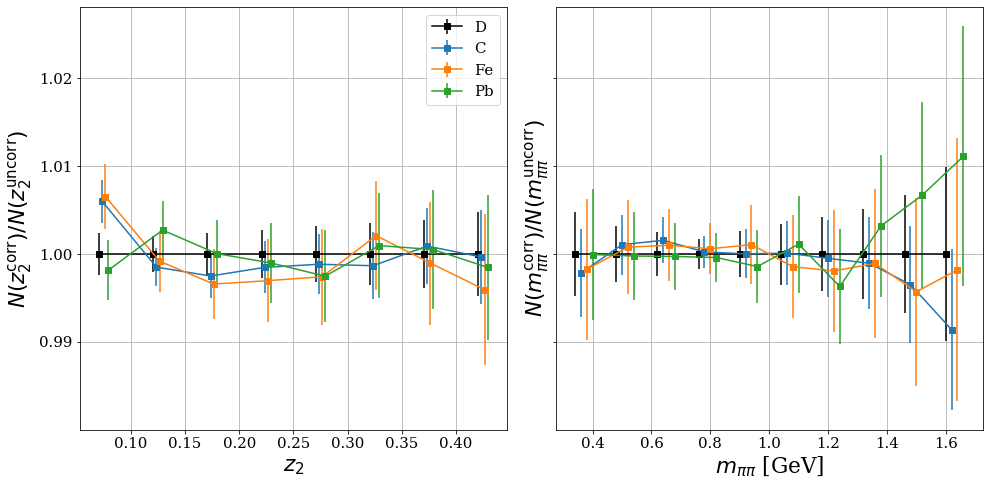

In [120]:

#kee=0.00143996 # coulomb constant * elementary charge^2 in GeV fm

fig, axs = plt.subplots(1, 2, figsize=(14,7),sharey='all')

alpha=1/137
hbarc = .1973
colors='k tab:blue tab:orange tab:green'.split()
for i,(a, Z, A) in enumerate(zip('D C Fe Pb'.split(), (1, 6, 26,82), (2,12,56,208))):
    
    q = "nu>2.2 and nu<4.2 and abs(h1_pid)==211 and h1_p <5.0 and h1_p>0.2 and Q2>1.0 and Q2<4.0"
    q+= " and inelasticity<0.85"
    q+= " and (h1_pid*h2_pid)<0."
    q+= " and h2_p>0.2 and h2_p<5.0"
    q+= " and abs(h2_pid)==211"
    df = dfs_data[f'GiBUU_{a}']
    df.eval('inelasticity = nu/5.014', inplace=True)
    df = df.query(q)
    R= 1.1*A**(1/3)+0.86*A**(-1/3)
    #deltaE=kee*Z/(N**(1/3)*R0)
    df.eval(f"h1_E=h1_z*nu", inplace=True)
    df.eval(f"h2_E=h2_z*nu", inplace=True)
    df.eval("h1_p=sqrt(h1_E**2-.13957039**2)")
    df.eval("h2_p=sqrt(h2_E**2-.13957039**2)")
    
    df.eval(f"h1_E_corr=h1_E+{hbarc*alpha*(Z-1)/R}*(-3/2+1/2*sqrt(pos_x**2+pos_y**2+pos_z**2)/{R})*(2*(h1_pid>0)-1)", inplace=True)
    df.eval(f"h2_E_corr=h2_E+{hbarc*alpha*(Z-1)/R}*(-3/2+1/2*sqrt(pos_x_asso**2+pos_y_asso**2+pos_z_asso**2)/{R})*(2*(h2_pid>0)-1)", inplace=True)
    df.eval("h1_p_corr=sqrt(h1_E_corr**2-.13957039**2)", inplace=True)
    df.eval("h2_p_corr=sqrt(h2_E_corr**2-.13957039**2)", inplace=True)
    #print(np.mean(df.eval("h2_E_corr-h2_z*nu")))
    #z2
    bins=np.linspace(0.05, 0.45, 9)
    plt.sca(axs[0])
    y1,xedges = np.histogram(df.eval("h2_z"),bins=bins)
    
    y2,xedges = np.histogram(df.eval(f"h2_E_corr/nu"),bins=bins)
    #print(deltaE,y1, y2)
    x=(xedges[1:]+xedges[:-1])/2
    opt = dict(marker='s',color=colors[i], label=a)
    plt.errorbar(x+(i-1.5)/350,y2/y1, y2/y1*np.sqrt(1/y1),**opt)
    
    pair_mass_corr=f"sqrt(2*.139**2+2*h1_E_corr*h2_E_corr" +\
                "-2*h1_p_corr*h2_p_corr*" +\
                f"(cos(h1_cm_th)*cos(h2_cm_th)+"+\
                f" sin(h1_cm_th)*sin(h2_cm_th)*"+\
                f" cos(h1_cm_ph-h2_cm_ph)))"
    
    #Mpipi
    plt.sca(axs[1])
    bins = np.linspace(.3, 1.7, 11)
    
    pair_mass=f"sqrt(2*.139**2+2*h1_E*h2_E" +\
                "-2*h1_p*h2_p*" +\
                f"(cos(h1_cm_th)*cos(h2_cm_th)+"+\
                f" sin(h1_cm_th)*sin(h2_cm_th)*"+\
                f" cos(h1_cm_ph-h2_cm_ph)))"
    
    y1,xedges = np.histogram(df.eval(pair_mass),bins=bins)

    pair_mass_corr=f"sqrt(2*.139**2+2*h1_E_corr*h2_E_corr" +\
                "-2*h1_p_corr*h2_p_corr*" +\
                f"(cos(h1_cm_th)*cos(h2_cm_th)+"+\
                f" sin(h1_cm_th)*sin(h2_cm_th)*"+\
                f" cos(h1_cm_ph-h2_cm_ph)))"
    y2,xedges = np.histogram(df.eval(pair_mass_corr),bins=bins)
    #print(deltaE,y1, y2)
    x=(xedges[1:]+xedges[:-1])/2
    plt.errorbar(x+(i-1.5)/50,y2/y1, y2/y1*np.sqrt(1/y1),**opt)
    #plt.plot(x, y2)
    #plt.plot(x, y1)
axs[0].set_ylabel("$N(z^{\\mathrm{corr}}_2)/N(z^{\\mathrm{uncorr}}_2)$")
axs[1].set_ylabel("$N(m^{\\mathrm{corr}}_{\\pi\\pi})/N(m^{\\mathrm{uncorr}}_{\\pi\\pi})$")
axs[0].set_xlabel("$z_2$")
axs[1].set_xlabel("$m_{\pi\pi}$ [GeV]")
axs[0].legend()
axs[0].grid()
axs[1].grid()
plt.tight_layout()
plt.savefig("images/coulomb_corr.png")
plt.show()

(array([1.58300e+03, 9.32300e+03, 6.36760e+04, 2.05359e+05, 7.20990e+04,
        3.28740e+04, 1.30160e+04, 4.17200e+03, 8.83000e+02, 8.60000e+01]),
 array([-0.00192096, -0.00103646, -0.00015197,  0.00073253,  0.00161702,
         0.00250152,  0.00338602,  0.00427051,  0.00515501,  0.0060395 ,
         0.006924  ]),
 <a list of 10 Patch objects>)

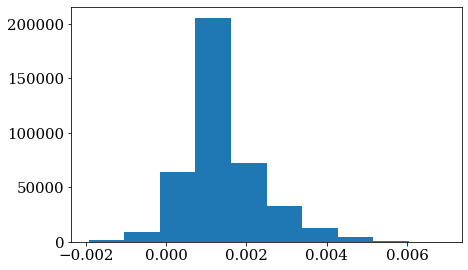

In [100]:
pair_mass_corr=f"sqrt(2*.139**2+2*h1_E_corr*h2_E_corr" +\
                "-2*h1_p_corr*h2_p_corr*" +\
                f"(cos(h1_cm_th)*cos(h2_cm_th)+"+\
                f" sin(h1_cm_th)*sin(h2_cm_th)*"+\
                f" cos(h1_cm_ph-h2_cm_ph)))"
pair_mass= "sqrt(2*.139**2+2*h1_E*h2_E" +\
                "-2*h1_p*h2_p*" +\
                f"(cos(h1_cm_th)*cos(h2_cm_th)+"+\
                f" sin(h1_cm_th)*sin(h2_cm_th)*"+\
                f" cos(h1_cm_ph-h2_cm_ph)))"
plt.hist(df.eval(f"{pair_mass}-pair_mass"))

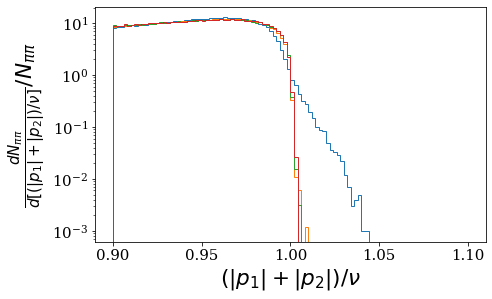

In [142]:
for a in "D C Fe Pb".split():
    plt.hist(dfs_data[f"GiBUU_{a}"].query("abs(h1_pid)==211 and abs(h2_pid)==211")\
                     .eval("(h1_z+h2_z)"), 
             bins=100, histtype='step', label=a,
            density=True,range=(0.9, 1.1))
plt.yscale("log")
plt.xlabel("$(|p_1|+|p_2|)/\\nu$")
plt.ylabel("$\\frac{dN_{\\pi\\pi}}{d[(|p_1|+|p_2|)/\\nu]}/N_{\\pi\\pi}$")
plt.show()


In [139]:
dfs_data[f"GiBUU_{a}"].columns

Index(['dphi', 'dphi_lab', 'qt', 'drap', 'h1_z', 'h2_z', 'z_tot', 'h1_xf',
       'h2_xf', 'h1_rap', 'ycm', 'h2_rap', 'h1_pid', 'h2_pid', 'h1_cm_ph',
       'h2_cm_ph', 'h1_cm_pt', 'h2_cm_pt', 'h1_cm_th', 'h2_cm_th', 'pair_mass',
       'pair_pt', 'mx_eh1h2', 'Q2', 'x', 'nu', 'W', 'h1_ph', 'h1_th', 'h2_ph',
       'h2_th', 'pos_x', 'pos_y', 'pos_z', 'pos_x_asso', 'pos_y_asso',
       'pos_z_asso', 'h1_FidCutPiPlus', 'h2_FidCutPiPlus', 'h1_e', 'h1_p',
       'h2_e', 'h2_p'],
      dtype='object')

Name: h Title: Sum$(sqrt(Px*Px+Py*Py+Pz*Pz)/nu*(abs(barcode)==211)) {Q2>1 && nu/5<.85 && Sum$(abs(barcode)>1000)>=1} NbinsX: 100
<class cppyy.gbl.TH1F at 0x5ecf560>
<class cppyy.gbl.TH1F at 0x5ecf560>
<class cppyy.gbl.TH1F at 0x5ecf560>


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


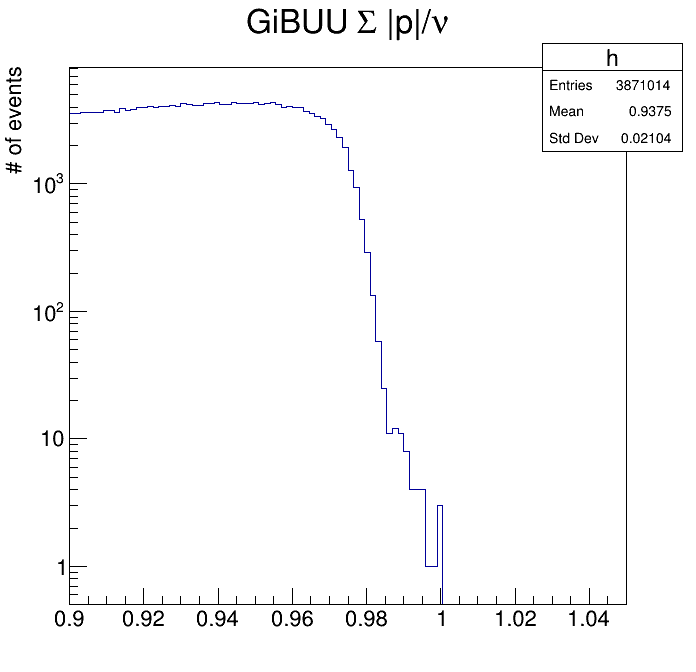

In [188]:
import ROOT
hists=[]
c1=ROOT.TCanvas("c1", "c2", 700, 700)
h = None
for a in 'D C Fe Pb'.split():
    f = ROOT.TFile(f"/home/miguel/GiBUU/GiBUU_{a}.root")
    tree = f.Get("RootTuple")
    tree.Draw(f"Sum$(sqrt(Px*Px+Py*Py+Pz*Pz)/nu*(abs(barcode)==211))>>+h(100, 0.9, 1.05)",
              "Q2>1 && nu/5<.85 && Sum$(abs(barcode)>1000)>=1",
              "",1000000)
    if h is None:
        f1 = f
        t1 = tree
        h = tree.GetHistogram().Clone()
        print(h)
    else:
        print(type(h))
        h.Add(tree.GetHistogram())
    
h.SetTitle("GiBUU #Sigma |p|/#nu; #Sigma_#pi |p|/#nu; # of events")
h.Draw()
c1.SetLogy()
c1.Draw()


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


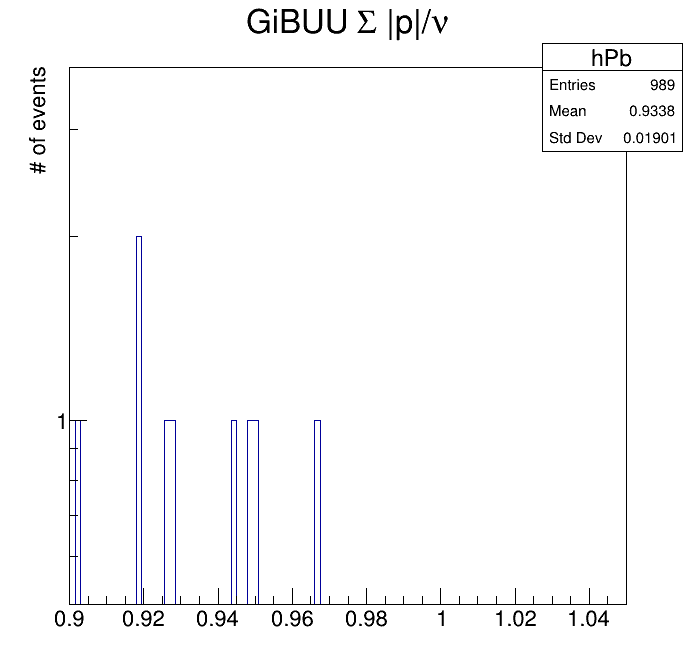

In [299]:
import ROOT
hists=[]
c1=ROOT.TCanvas("c1", "c2", 700, 700)
h = None
files = []
trees = []
for a in 'D C Fe Pb'.split():
    f = ROOT.TFile(f"/home/miguel/GiBUU/GiBUU_{a}.root")
    tree = f.Get("RootTuple")
    tree.Draw(f"Sum$(sqrt(Px*Px+Py*Py+Pz*Pz)/nu*(abs(barcode)==211))>>h{a}(100, 0.9, 1.05)",
              "Q2>1 && nu/5<.85 && Sum$(abs(barcode)>1000)>=1",
              "" if a == 'D' else 'SAME',1000)
    
    files.append(f)
    trees.append(tree)
    h = tree.GetHistogram().Clone()
    hists.append(h)
for i in range(len(hists)):
    hists[i].Draw("" if i == 0 else "SAME")
    
h.SetTitle("GiBUU #Sigma |p|/#nu; #Sigma_#pi |p|/#nu; # of events")
h.Draw()
c1.SetLogy()
c1.Draw()

In [241]:
import ROOT
hists=[]
c1=ROOT.TCanvas("c1", "c2", 700, 700)
binContents = []
for a in 'D C Fe Pb'.split():
    f = ROOT.TFile(f"/home/miguel/GiBUU/GiBUU_{a}.root")
    if h is None:
        f1 = f
        t1 = tree
    h = ROOT.TH1D("h"+a, "GiBUU (|p_{1}|+|p_{2}|)/#nu; (|p_{1}|+|p_{2}|)/#nu; events", 100, .9, 1.05)
    hists.append(h.Clone())

    tree = f.Get("RootTuple")
    for k, event in enumerate(tree):
        if k >1000000:
            break;
        foundbaryon = False
        for i in range(len(event.barcode)):
            if abs(event.barcode[i])>1000:
                foundbaryon = True
                break;
        if not foundbaryon:
            continue
        for i in range(len(event.barcode)):
            if abs(event.barcode[i]) != 211:
                continue;
            for j in range(len(event.barcode)):
                if abs(event.barcode[j]) != 211 or i == j:
                    continue;
                h.Fill((np.sqrt(event.Px[i]**2+event.Py[i]**2+event.Pz[i]**2)+
                        np.sqrt(event.Px[j]**2+event.Py[j]**2+event.Pz[j]**2))/event.nu)
    binContents.append([h.GetBinContent(i) for i in range(100)])                

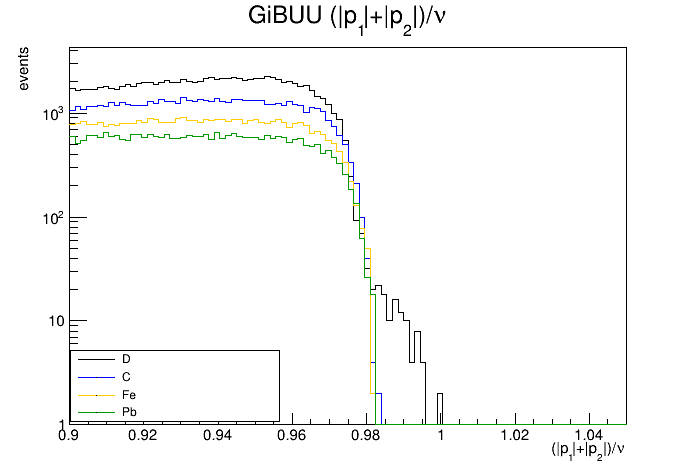

In [301]:
#h.SetTitle("GiBUU #Sigma |p|/#nu; #Sigma_#pi |p|/#nu; # of events")
c1 = ROOT.TCanvas()
hists = []
colors = [ROOT.kBlack, ROOT.kBlue, ROOT.kOrange, ROOT.kGreen+2]
l = ROOT.TLegend()
for i in range(4):
    a = "D C Fe Pb".split()[i]
    h = ROOT.TH1D("h"+a, "GiBUU (|p_{1}|+|p_{2}|)/#nu; (|p_{1}|+|p_{2}|)/#nu; events", 100, .9, 1.05)
    for j in range(100):
        h.SetBinContent(j, binContents[i][j])
    h.SetLineColor(colors[i])
    if i==0:
        h.Draw()
    else :
        h.Draw("SAME")
    
    hists.append(h)
    l.AddEntry(h, a)
    #if i == 0:
    #    h.Draw()
    #else:
    #    h.Draw("SAME")
#    h.Draw("HIST" if i == 0 else "SAME")
l.Draw()
ROOT.gStyle.SetOptStat(0)
c1.SetLogy()
c1.Draw()

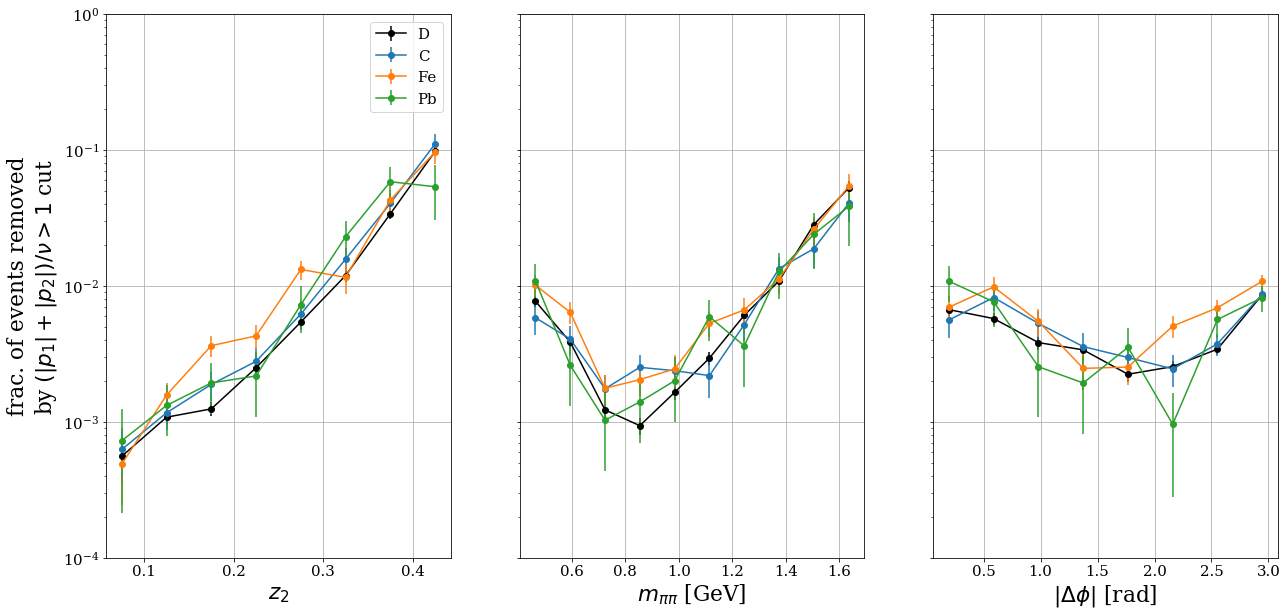

In [214]:
fig, axs = plt.subplots(1,3, figsize=(21, 10),sharey='all')
axs[0].set_ylabel("frac. of events removed\nby $(|p_1|+|p_2|)/\\nu>1$ cut")
axs[0].set_xlabel("$z_2$")
axs[1].set_xlabel("$m_{\pi\pi}$ [GeV]")
axs[2].set_xlabel("$|\Delta\phi|$ [rad]")

q = "nu>2.2 and nu<4.2 and abs(h1_pid)==211 and h1_p <5.0 and h1_p>0.2 and Q2>1.0 and Q2<4.0 and abs(h2_pid)==211"
q+= ' and '+ R2h_module.pair_cut_nom.replace('and (h1_p+h2_p)/nu<1.0', " ")

   
for a, col in zip("D C Fe Pb".split(), "k tab:blue tab:orange tab:green".split()):
    for i,(xname, n, r) in enumerate(zip("h2_z pair_mass dphi".split(), (9, 11, 9),
                                         ((.05, .45), (.4, 1.7), (0, np.pi)))):
        df = dfs_data[a].query(q)
        num, xedge = np.histogram(df.query("h1_p+h2_p>nu").eval(xname), bins=np.linspace(*r,n))
        denom, xedge = np.histogram(df.eval(xname), bins=np.linspace(*r,n))
        x = (xedge[1:]+xedge[:-1])/2
        #print(xname, num/denom)
        axs[i].errorbar(x, num/denom, np.sqrt(num*(denom-num)/denom**3), 
                        color=col, marker='o', label=a)
        axs[i].set_yscale('log')
        
for ax in axs:
    ax.grid()
    ax.set_ylim(0.0001, 1)
axs[0].legend()
plt.show()

Starting election on dipion variables
This is Data
1.0< Q2 <4.0 1643292  (100.00  %)
2.2 < nu < 4.2 1620457  (98.61  %)
secondary hadrons are pions 1080372  (66.67  %)
(h1_pid*h2_pid)<0, opposite charge pions 491140  (45.46  %)
kinematic limits for h2_z 472563  (96.22  %)
kinematic limits for dphi 472167  (99.92  %)
kinematic limits for pair_mass 426852  (90.40  %)
leading hadrons are pions 96208  (22.54  %)
0.2<h2_p<5.0 96208  (100.00  %)
0.2<h1_p<5.0 96208  (100.00  %)
25 degree separation between pion and electron.  This is a dumb cut 96208  (100.00  %)
10<h2_th 96208  (100.00  %)
Theta/P fiducial region selected for secondary hadron 88958  (92.46  %)
10< h1_th 88958  (100.00  %)
Theta/P fiducial region selected for trigger hadron 88958  (100.00  %)
Starting election on dipion variables
This is Data
1.0< Q2 <4.0 1456232  (100.00  %)
2.2 < nu < 4.2 1433772  (98.46  %)
secondary hadrons are pions 1177886  (82.15  %)
(h1_pid*h2_pid)<0, opposite charge pions 563752  (47.86  %)
kinematic

secondary hadrons are pions 1711797  (82.07  %)
(h1_pid*h2_pid)<0, opposite charge pions 818920  (47.84  %)
kinematic limits for h2_z 779150  (95.14  %)
kinematic limits for dphi 778354  (99.90  %)
kinematic limits for pair_mass 707673  (90.92  %)
leading hadrons are pions 209843  (29.65  %)
0.2<h2_p<5.0 209843  (100.00  %)
0.2<h1_p<5.0 209843  (100.00  %)
25 degree separation between pion and electron.  This is a dumb cut 209843  (100.00  %)
10<h2_th 209843  (100.00  %)
Theta/P fiducial region selected for secondary hadron 192743  (91.85  %)
10< h1_th 192743  (100.00  %)
Theta/P fiducial region selected for trigger hadron 192743  (100.00  %)
Entries before cut  336947
Q2>1.0 and Q2<4.0 336947  (100.00  %)
0.2<h1_p<5.0  336947  (100.00  %)
inelasticity < 0.85 336947  (100.00  %)
h1_pid = pions (trigger) 336947  (100.00  %)
2.2 < nu <4.2 336947  (100.00  %)
25 degree separation between pion and electron.  This is a dumb cut 336947  (100.00  %)
10< h1_th 336947  (100.00  %)
Theta/P fiduc

Q2>1.0 and Q2<4.0 622000  (100.00  %)
0.2<h1_p<5.0  622000  (100.00  %)
inelasticity < 0.85 622000  (100.00  %)
h1_pid = pions (trigger) 622000  (100.00  %)
2.2 < nu <4.2 622000  (100.00  %)
25 degree separation between pion and electron.  This is a dumb cut 622000  (100.00  %)
10< h1_th 622000  (100.00  %)
Theta/P fiducial region selected for trigger hadron 622000  (100.00  %)
Nom cuts for the trigger applied 622000  (100.00  %)
Starting election on dipion variables
This is Data
1.0< Q2 <4.0 1220015  (100.00  %)
2.2 < nu < 4.2 1205719  (98.83  %)
secondary hadrons are pions 543978  (45.12  %)
(h1_pid*h2_pid)<0, opposite charge pions 248036  (45.60  %)
kinematic limits for h2_z 240611  (97.01  %)
kinematic limits for dphi 240428  (99.92  %)
kinematic limits for pair_mass 218749  (90.98  %)
leading hadrons are pions 34773  (15.90  %)
0.2<h2_p<5.0 34773  (100.00  %)
0.2<h1_p<5.0 34773  (100.00  %)
25 degree separation between pion and electron.  This is a dumb cut 34773  (100.00  %)
10<h

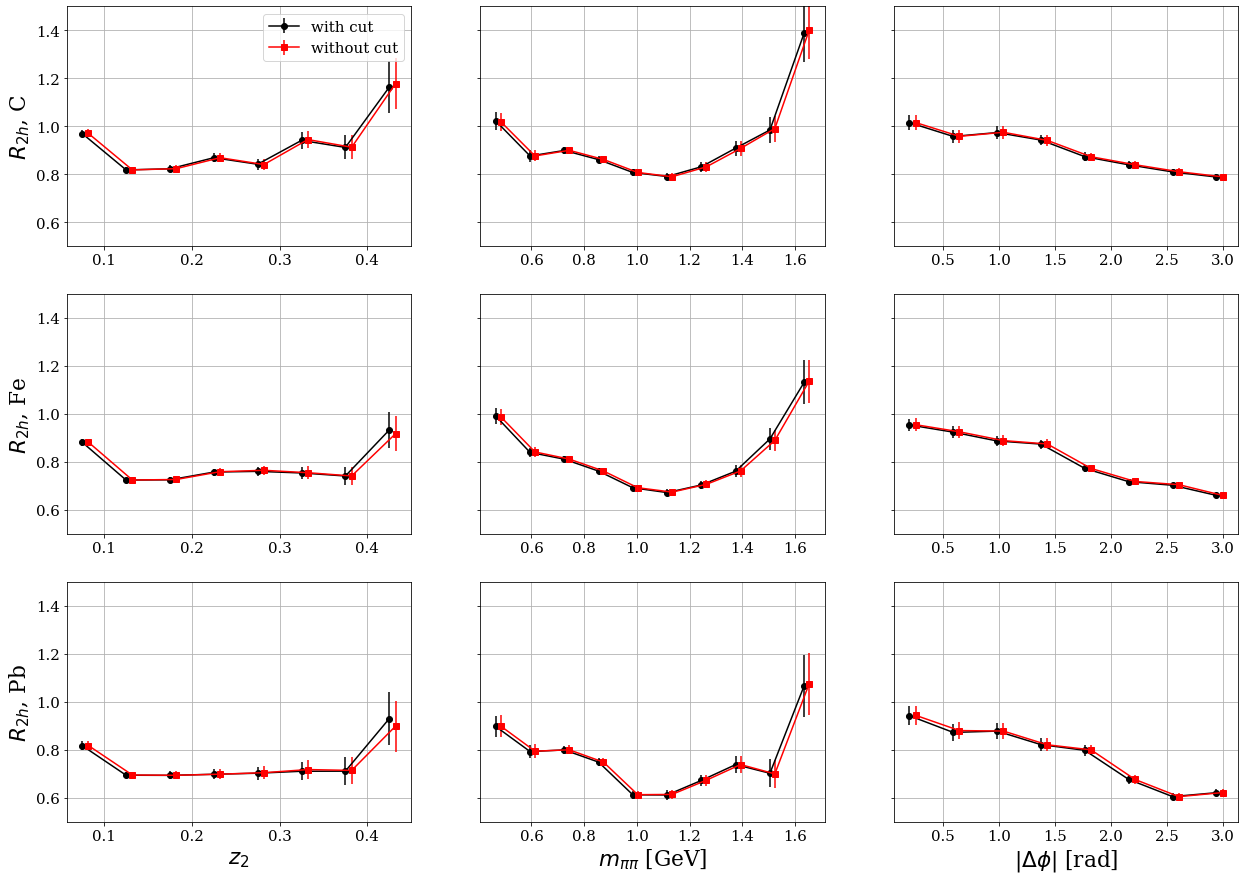

In [350]:
imp.reload(R2h_module)
fig, axs = plt.subplots(3,3, figsize=(21, 15),sharey='all')
#axs[0].set_ylabel("($R_{2h}$ with $\\frac{|p_1|+|p_2|}{\\nu}<1$ cut)/($R_{2h}$ without cut)")
axs[-1][0].set_xlabel("$z_2$")
axs[-1][1].set_xlabel("$m_{\pi\pi}$ [GeV]")
axs[-1][2].set_xlabel("$|\Delta\phi|$ [rad]")
axs[0][0].set_ylim(0.5,1.5)

q = "nu>2.2 and nu<4.2 and h1_pid*h2_pid==-211**2 and h1_p <5.0 and h1_p>0.2 and Q2>1.0 and Q2<4.0 and abs(h2_pid)==211"
q+= ' and '+ R2h_module.pair_cut_nom.replace('and (h1_p+h2_p)/nu<1.0', " ")

   
for i,(a, col) in enumerate(zip("C Fe Pb".split(), "tab:blue tab:orange tab:green".split())):
    for j,(xname, n, r) in enumerate(zip("h2_z pair_mass dphi".split(), (9, 11, 9),
                                         ((.05, .45), (.4, 1.7), (0, np.pi)))):
        
        dfA = R2h_module.applyCutsPair(dfs_data[a],nomCuts=False).query(R2h_module.pair_cut_nom.replace('and (h1_p+h2_p)/nu<1.0', " "))
        dfD = R2h_module.applyCutsPair(dfs_data["D_"+a],nomCuts=False).query(R2h_module.pair_cut_nom.replace('and (h1_p+h2_p)/nu<1.0', " "))
        
        dfA_trig = R2h_module.applyCuts(dfs_trigger[a],nomCuts=True)
        dfD_trig = R2h_module.applyCuts(dfs_trigger["D_" +a],nomCuts=True)
        
        nA2, xedge = np.histogram(dfA.query("h1_p+h2_p<nu").eval(xname), bins=np.linspace(*r,n))
        nAtr = len(dfA_trig)
        nD2, xedge = np.histogram(dfD.query("h1_p+h2_p<nu").eval(xname), bins=np.linspace(*r,n))
        nDtr = len(dfD_trig)
        R = (nA2/nAtr)/(nD2/nDtr)
        dR = R*(np.sqrt(1/nA2+1/nD2))
        
        x = (xedge[1:]+xedge[:-1])/2
        axs[i][j].errorbar(x, R, dR,
                        color='k', marker='o', label=f"with cut")
        
        
        
        nA2, xedge = np.histogram(dfA.eval(xname), bins=np.linspace(*r,n))
        nAtr = len(dfA_trig)
        nD2, xedge = np.histogram(dfD.eval(xname), bins=np.linspace(*r,n))
        nDtr = len(dfD_trig)
        R = (nA2/nAtr)/(nD2/nDtr)
        dR = R*(np.sqrt(1/nA2+1/nD2))
        x = (xedge[1:]+xedge[:-1])/2+(x[1]-x[0])*1/7
        axs[i][j].errorbar(x, R, dR,
                        color='r', marker='s', label=f"without cut")
        #print(xname, num/denom)
        
        
        #axs[i].set_yscale('log')
axs[0][0].legend()        
for row,a in zip(axs,"C Fe Pb".split()):
    row[0].set_ylabel(f"$R_{{2h}}$, {a}")
    
    for ax in row:
        ax.grid()
    #ax.set_ylim(0.0001, 1)
plt.show()

Starting election on dipion variables
This is Data
1.0< Q2 <4.0 1643292  (100.00  %)
2.2 < nu < 4.2 1620457  (98.61  %)
secondary hadrons are pions 1080372  (66.67  %)
(h1_pid*h2_pid)<0, opposite charge pions 491140  (45.46  %)
kinematic limits for h2_z 472563  (96.22  %)
kinematic limits for dphi 472167  (99.92  %)
kinematic limits for pair_mass 426852  (90.40  %)
leading hadrons are pions 96208  (22.54  %)
0.2<h2_p<5.0 96208  (100.00  %)
0.2<h1_p<5.0 96208  (100.00  %)
25 degree separation between pion and electron.  This is a dumb cut 96208  (100.00  %)
10<h2_th 96208  (100.00  %)
Theta/P fiducial region selected for secondary hadron 88958  (92.46  %)
10< h1_th 88958  (100.00  %)
Theta/P fiducial region selected for trigger hadron 88958  (100.00  %)
Starting election on dipion variables
This is Data
1.0< Q2 <4.0 1456232  (100.00  %)
2.2 < nu < 4.2 1433772  (98.46  %)
secondary hadrons are pions 1177886  (82.15  %)
(h1_pid*h2_pid)<0, opposite charge pions 563752  (47.86  %)
kinematic

1.0< Q2 <4.0 2114873  (100.00  %)
2.2 < nu < 4.2 2085841  (98.63  %)
secondary hadrons are pions 1711797  (82.07  %)
(h1_pid*h2_pid)<0, opposite charge pions 818920  (47.84  %)
kinematic limits for h2_z 779150  (95.14  %)
kinematic limits for dphi 778354  (99.90  %)
kinematic limits for pair_mass 707673  (90.92  %)
leading hadrons are pions 209843  (29.65  %)
0.2<h2_p<5.0 209843  (100.00  %)
0.2<h1_p<5.0 209843  (100.00  %)
25 degree separation between pion and electron.  This is a dumb cut 209843  (100.00  %)
10<h2_th 209843  (100.00  %)
Theta/P fiducial region selected for secondary hadron 192743  (91.85  %)
10< h1_th 192743  (100.00  %)
Theta/P fiducial region selected for trigger hadron 192743  (100.00  %)
Starting election on dipion variables
This is Data
1.0< Q2 <4.0 1220015  (100.00  %)
2.2 < nu < 4.2 1205719  (98.83  %)
secondary hadrons are pions 543978  (45.12  %)
(h1_pid*h2_pid)<0, opposite charge pions 248036  (45.60  %)
kinematic limits for h2_z 240611  (97.01  %)
kinemati

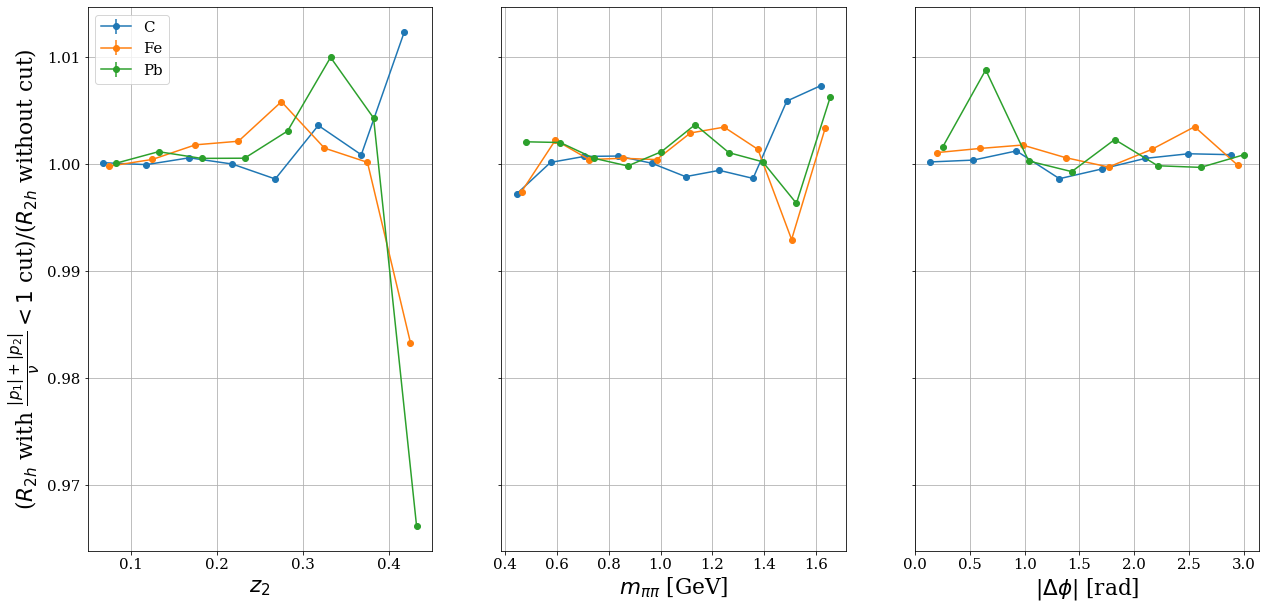

sh: 1: cls: not found
sh: 1: cls: not found
sh: 1: cls: not found
sh: 1: cls: not found
sh: 1: cls: not found
sh: 1: cls: not found
sh: 1: cls: not found
sh: 1: cls: not found
sh: 1: cls: not found


In [338]:
imp.reload(R2h_module)
fig, axs = plt.subplots(1,3, figsize=(21, 10),sharey='all')
axs[0].set_ylabel("($R_{2h}$ with $\\frac{|p_1|+|p_2|}{\\nu}<1$ cut)/($R_{2h}$ without cut)")
axs[0].set_xlabel("$z_2$")
axs[1].set_xlabel("$m_{\pi\pi}$ [GeV]")
axs[2].set_xlabel("$|\Delta\phi|$ [rad]")

q = "nu>2.2 and nu<4.2 and h1_pid*h2_pid==-211**2 and h1_p <5.0 and h1_p>0.2 and Q2>1.0 and Q2<4.0 and abs(h2_pid)==211"
q+= ' and '+ R2h_module.pair_cut_nom.replace('and (h1_p+h2_p)/nu<1.0', " ")

   
for j,(a, col) in enumerate(zip("C Fe Pb".split(), "tab:blue tab:orange tab:green".split())):
    for i,(xname, n, r) in enumerate(zip("h2_z pair_mass dphi".split(), (9, 11, 9),
                                         ((.05, .45), (.4, 1.7), (0, np.pi)))):
        
        df = R2h_module.applyCutsPair(dfs_data[a],nomCuts=False).query(R2h_module.pair_cut_nom.replace('and (h1_p+h2_p)/nu<1.0', " "))
        num1, xedge = np.histogram(df.query("h1_p+h2_p<nu").eval(xname), bins=np.linspace(*r,n))
        denom1, xedge = np.histogram(df.eval(xname), bins=np.linspace(*r,n))

        df = R2h_module.applyCutsPair(dfs_data["D_"+a],nomCuts=False).query(R2h_module.pair_cut_nom.replace('and (h1_p+h2_p)/nu<1.0', " "))
        num2, xedge = np.histogram(df.query("h1_p+h2_p<nu").eval(xname), bins=np.linspace(*r,n))
        denom2, xedge = np.histogram(df.eval(xname), bins=np.linspace(*r,n))
        
        
        x = (xedge[1:]+xedge[:-1])/2
        #print(xname, num/denom)
        r = (num2/denom2)/(num1/denom1)
        
        dr = np.sqrt(num2*(denom2-num2)/denom2**3+num1*(denom1-num1)/denom1**3)
        
        axs[i].errorbar(x+(x[1]-x[0])*(j-1)/7, r, 0,
                        color=col, marker='o', label=a)
        #axs[i].set_yscale('log')
        
for ax in axs:
    ax.grid()
    #ax.set_ylim(0.0001, 1)
axs[0].legend()
plt.show()

Starting election on dipion variables
This is Data
1.0< Q2 <4.0 1643292  (100.00  %)
2.2 < nu < 4.2 1620457  (98.61  %)
secondary hadrons are pions 1080372  (66.67  %)
(h1_pid*h2_pid)<0, opposite charge pions 491140  (45.46  %)
kinematic limits for h2_z 472563  (96.22  %)
kinematic limits for dphi 472167  (99.92  %)
kinematic limits for pair_mass 426852  (90.40  %)
leading hadrons are pions 96208  (22.54  %)
0.2<h2_p<5.0 96208  (100.00  %)
0.2<h1_p<5.0 96208  (100.00  %)
25 degree separation between pion and electron.  This is a dumb cut 96208  (100.00  %)
10<h2_th 96208  (100.00  %)
Theta/P fiducial region selected for secondary hadron 96208  (100.00  %)
10< h1_th 96208  (100.00  %)
Theta/P fiducial region selected for trigger hadron 96208  (100.00  %)
Starting election on dipion variables
This is Data
1.0< Q2 <4.0 1456232  (100.00  %)
2.2 < nu < 4.2 1433772  (98.46  %)
secondary hadrons are pions 1177886  (82.15  %)
(h1_pid*h2_pid)<0, opposite charge pions 563752  (47.86  %)
kinemati

<ipython-input-296-c00e87073f66>:29: RuntimeWarning: invalid value encountered in sqrt
  dr = np.sqrt(num2*(denom2-num2)/denom2**3+num1*(denom1-num1)/denom1**3)


Starting election on dipion variables
This is Data
1.0< Q2 <4.0 1643292  (100.00  %)
2.2 < nu < 4.2 1620457  (98.61  %)
secondary hadrons are pions 1080372  (66.67  %)
(h1_pid*h2_pid)<0, opposite charge pions 491140  (45.46  %)
kinematic limits for h2_z 472563  (96.22  %)
kinematic limits for dphi 472167  (99.92  %)
kinematic limits for pair_mass 426852  (90.40  %)
leading hadrons are pions 96208  (22.54  %)
0.2<h2_p<5.0 96208  (100.00  %)
0.2<h1_p<5.0 96208  (100.00  %)
25 degree separation between pion and electron.  This is a dumb cut 96208  (100.00  %)
10<h2_th 96208  (100.00  %)
Theta/P fiducial region selected for secondary hadron 96208  (100.00  %)
10< h1_th 96208  (100.00  %)
Theta/P fiducial region selected for trigger hadron 96208  (100.00  %)
Starting election on dipion variables
This is Data
1.0< Q2 <4.0 1456232  (100.00  %)
2.2 < nu < 4.2 1433772  (98.46  %)
secondary hadrons are pions 1177886  (82.15  %)
(h1_pid*h2_pid)<0, opposite charge pions 563752  (47.86  %)
kinemati

<ipython-input-296-c00e87073f66>:29: RuntimeWarning: invalid value encountered in sqrt
  dr = np.sqrt(num2*(denom2-num2)/denom2**3+num1*(denom1-num1)/denom1**3)


Starting election on dipion variables
This is Data
1.0< Q2 <4.0 1643292  (100.00  %)
2.2 < nu < 4.2 1620457  (98.61  %)
secondary hadrons are pions 1080372  (66.67  %)
(h1_pid*h2_pid)<0, opposite charge pions 491140  (45.46  %)
kinematic limits for h2_z 472563  (96.22  %)
kinematic limits for dphi 472167  (99.92  %)
kinematic limits for pair_mass 426852  (90.40  %)
leading hadrons are pions 96208  (22.54  %)
0.2<h2_p<5.0 96208  (100.00  %)
0.2<h1_p<5.0 96208  (100.00  %)
25 degree separation between pion and electron.  This is a dumb cut 96208  (100.00  %)
10<h2_th 96208  (100.00  %)
Theta/P fiducial region selected for secondary hadron 96208  (100.00  %)
10< h1_th 96208  (100.00  %)
Theta/P fiducial region selected for trigger hadron 96208  (100.00  %)
Starting election on dipion variables
This is Data
1.0< Q2 <4.0 1456232  (100.00  %)
2.2 < nu < 4.2 1433772  (98.46  %)
secondary hadrons are pions 1177886  (82.15  %)
(h1_pid*h2_pid)<0, opposite charge pions 563752  (47.86  %)
kinemati

<ipython-input-296-c00e87073f66>:29: RuntimeWarning: invalid value encountered in sqrt
  dr = np.sqrt(num2*(denom2-num2)/denom2**3+num1*(denom1-num1)/denom1**3)


Starting election on dipion variables
This is Data
1.0< Q2 <4.0 2768303  (100.00  %)
2.2 < nu < 4.2 2736478  (98.85  %)
secondary hadrons are pions 1433041  (52.37  %)
(h1_pid*h2_pid)<0, opposite charge pions 633264  (44.19  %)
kinematic limits for h2_z 612724  (96.76  %)
kinematic limits for dphi 612292  (99.93  %)
kinematic limits for pair_mass 554559  (90.57  %)
leading hadrons are pions 99242  (17.90  %)
0.2<h2_p<5.0 99242  (100.00  %)
0.2<h1_p<5.0 99241  (100.00  %)
25 degree separation between pion and electron.  This is a dumb cut 99241  (100.00  %)
10<h2_th 99241  (100.00  %)
Theta/P fiducial region selected for secondary hadron 99241  (100.00  %)
10< h1_th 99241  (100.00  %)
Theta/P fiducial region selected for trigger hadron 99241  (100.00  %)
Starting election on dipion variables
This is Data
1.0< Q2 <4.0 2114873  (100.00  %)
2.2 < nu < 4.2 2085841  (98.63  %)
secondary hadrons are pions 1711797  (82.07  %)
(h1_pid*h2_pid)<0, opposite charge pions 818920  (47.84  %)
kinemati

<ipython-input-296-c00e87073f66>:29: RuntimeWarning: invalid value encountered in sqrt
  dr = np.sqrt(num2*(denom2-num2)/denom2**3+num1*(denom1-num1)/denom1**3)


1.0< Q2 <4.0 2768303  (100.00  %)
2.2 < nu < 4.2 2736478  (98.85  %)
secondary hadrons are pions 1433041  (52.37  %)
(h1_pid*h2_pid)<0, opposite charge pions 633264  (44.19  %)
kinematic limits for h2_z 612724  (96.76  %)
kinematic limits for dphi 612292  (99.93  %)
kinematic limits for pair_mass 554559  (90.57  %)
leading hadrons are pions 99242  (17.90  %)
0.2<h2_p<5.0 99242  (100.00  %)
0.2<h1_p<5.0 99241  (100.00  %)
25 degree separation between pion and electron.  This is a dumb cut 99241  (100.00  %)
10<h2_th 99241  (100.00  %)
Theta/P fiducial region selected for secondary hadron 99241  (100.00  %)
10< h1_th 99241  (100.00  %)
Theta/P fiducial region selected for trigger hadron 99241  (100.00  %)
Starting election on dipion variables
This is Data
1.0< Q2 <4.0 2114873  (100.00  %)
2.2 < nu < 4.2 2085841  (98.63  %)
secondary hadrons are pions 1711797  (82.07  %)
(h1_pid*h2_pid)<0, opposite charge pions 818920  (47.84  %)
kinematic limits for h2_z 779150  (95.14  %)
kinematic limi

<ipython-input-296-c00e87073f66>:29: RuntimeWarning: invalid value encountered in sqrt
  dr = np.sqrt(num2*(denom2-num2)/denom2**3+num1*(denom1-num1)/denom1**3)


1.0< Q2 <4.0 2768303  (100.00  %)
2.2 < nu < 4.2 2736478  (98.85  %)
secondary hadrons are pions 1433041  (52.37  %)
(h1_pid*h2_pid)<0, opposite charge pions 633264  (44.19  %)
kinematic limits for h2_z 612724  (96.76  %)
kinematic limits for dphi 612292  (99.93  %)
kinematic limits for pair_mass 554559  (90.57  %)
leading hadrons are pions 99242  (17.90  %)
0.2<h2_p<5.0 99242  (100.00  %)
0.2<h1_p<5.0 99241  (100.00  %)
25 degree separation between pion and electron.  This is a dumb cut 99241  (100.00  %)
10<h2_th 99241  (100.00  %)
Theta/P fiducial region selected for secondary hadron 99241  (100.00  %)
10< h1_th 99241  (100.00  %)
Theta/P fiducial region selected for trigger hadron 99241  (100.00  %)
Starting election on dipion variables
This is Data
1.0< Q2 <4.0 2114873  (100.00  %)
2.2 < nu < 4.2 2085841  (98.63  %)
secondary hadrons are pions 1711797  (82.07  %)
(h1_pid*h2_pid)<0, opposite charge pions 818920  (47.84  %)
kinematic limits for h2_z 779150  (95.14  %)
kinematic limi

<ipython-input-296-c00e87073f66>:29: RuntimeWarning: invalid value encountered in sqrt
  dr = np.sqrt(num2*(denom2-num2)/denom2**3+num1*(denom1-num1)/denom1**3)


1.0< Q2 <4.0 1220015  (100.00  %)
2.2 < nu < 4.2 1205719  (98.83  %)
secondary hadrons are pions 543978  (45.12  %)
(h1_pid*h2_pid)<0, opposite charge pions 248036  (45.60  %)
kinematic limits for h2_z 240611  (97.01  %)
kinematic limits for dphi 240428  (99.92  %)
kinematic limits for pair_mass 218749  (90.98  %)
leading hadrons are pions 34773  (15.90  %)
0.2<h2_p<5.0 34773  (100.00  %)
0.2<h1_p<5.0 34773  (100.00  %)
25 degree separation between pion and electron.  This is a dumb cut 34773  (100.00  %)
10<h2_th 34773  (100.00  %)
Theta/P fiducial region selected for secondary hadron 34773  (100.00  %)
10< h1_th 34773  (100.00  %)
Theta/P fiducial region selected for trigger hadron 34773  (100.00  %)
Starting election on dipion variables
This is Data
1.0< Q2 <4.0 2209208  (100.00  %)
2.2 < nu < 4.2 2176816  (98.53  %)
secondary hadrons are pions 1786684  (82.08  %)
(h1_pid*h2_pid)<0, opposite charge pions 851890  (47.68  %)
kinematic limits for h2_z 810516  (95.14  %)
kinematic limit

<ipython-input-296-c00e87073f66>:29: RuntimeWarning: invalid value encountered in sqrt
  dr = np.sqrt(num2*(denom2-num2)/denom2**3+num1*(denom1-num1)/denom1**3)


1.0< Q2 <4.0 1220015  (100.00  %)
2.2 < nu < 4.2 1205719  (98.83  %)
secondary hadrons are pions 543978  (45.12  %)
(h1_pid*h2_pid)<0, opposite charge pions 248036  (45.60  %)
kinematic limits for h2_z 240611  (97.01  %)
kinematic limits for dphi 240428  (99.92  %)
kinematic limits for pair_mass 218749  (90.98  %)
leading hadrons are pions 34773  (15.90  %)
0.2<h2_p<5.0 34773  (100.00  %)
0.2<h1_p<5.0 34773  (100.00  %)
25 degree separation between pion and electron.  This is a dumb cut 34773  (100.00  %)
10<h2_th 34773  (100.00  %)
Theta/P fiducial region selected for secondary hadron 34773  (100.00  %)
10< h1_th 34773  (100.00  %)
Theta/P fiducial region selected for trigger hadron 34773  (100.00  %)
Starting election on dipion variables
This is Data
1.0< Q2 <4.0 2209208  (100.00  %)
2.2 < nu < 4.2 2176816  (98.53  %)
secondary hadrons are pions 1786684  (82.08  %)
(h1_pid*h2_pid)<0, opposite charge pions 851890  (47.68  %)
kinematic limits for h2_z 810516  (95.14  %)
kinematic limit

<ipython-input-296-c00e87073f66>:29: RuntimeWarning: invalid value encountered in sqrt
  dr = np.sqrt(num2*(denom2-num2)/denom2**3+num1*(denom1-num1)/denom1**3)


1.0< Q2 <4.0 1220015  (100.00  %)
2.2 < nu < 4.2 1205719  (98.83  %)
secondary hadrons are pions 543978  (45.12  %)
(h1_pid*h2_pid)<0, opposite charge pions 248036  (45.60  %)
kinematic limits for h2_z 240611  (97.01  %)
kinematic limits for dphi 240428  (99.92  %)
kinematic limits for pair_mass 218749  (90.98  %)
leading hadrons are pions 34773  (15.90  %)
0.2<h2_p<5.0 34773  (100.00  %)
0.2<h1_p<5.0 34773  (100.00  %)
25 degree separation between pion and electron.  This is a dumb cut 34773  (100.00  %)
10<h2_th 34773  (100.00  %)
Theta/P fiducial region selected for secondary hadron 34773  (100.00  %)
10< h1_th 34773  (100.00  %)
Theta/P fiducial region selected for trigger hadron 34773  (100.00  %)
Starting election on dipion variables
This is Data
1.0< Q2 <4.0 2209208  (100.00  %)
2.2 < nu < 4.2 2176816  (98.53  %)
secondary hadrons are pions 1786684  (82.08  %)
(h1_pid*h2_pid)<0, opposite charge pions 851890  (47.68  %)
kinematic limits for h2_z 810516  (95.14  %)
kinematic limit

<ipython-input-296-c00e87073f66>:29: RuntimeWarning: invalid value encountered in sqrt
  dr = np.sqrt(num2*(denom2-num2)/denom2**3+num1*(denom1-num1)/denom1**3)


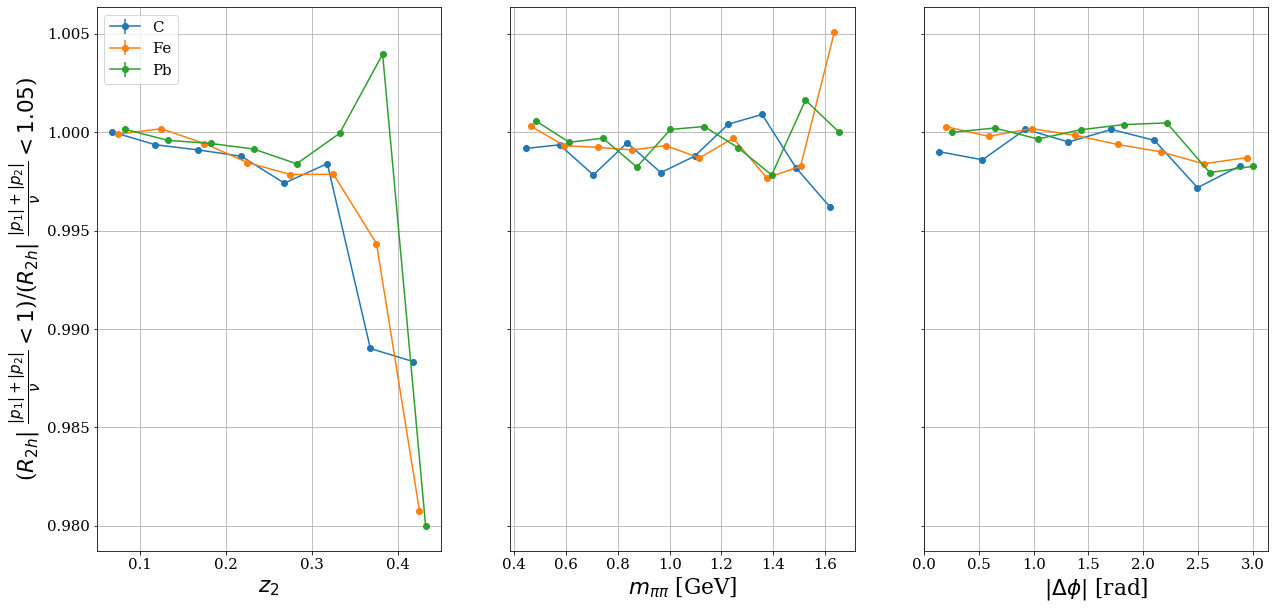

In [296]:
imp.reload(R2h_module)
fig, axs = plt.subplots(1,3, figsize=(21, 10),sharey='all')
axs[0].set_ylabel("($R_{2h}$| $\\frac{|p_1|+|p_2|}{\\nu}<1$)/($R_{2h}$| $\\frac{|p_1|+|p_2|}{\\nu}<1.05$)")
axs[0].set_xlabel("$z_2$")
axs[1].set_xlabel("$m_{\pi\pi}$ [GeV]")
axs[2].set_xlabel("$|\Delta\phi|$ [rad]")

q = "nu>2.2 and nu<4.2 and h1_pid*h2_pid==-211**2 and h1_p <5.0 and h1_p>0.2 and Q2>1.0 and Q2<4.0 and abs(h2_pid)==211"
q+= ' and '+ R2h_module.pair_cut_nom.replace('and (h1_p+h2_p)/nu<1.0', " ")

   
for j,(a, col) in enumerate(zip("C Fe Pb".split(), "tab:blue tab:orange tab:green".split())):
    for i,(xname, n, r) in enumerate(zip("h2_z pair_mass dphi".split(), (9, 11, 9),
                                         ((.05, .45), (.4, 1.7), (0, np.pi)))):
        
        df = R2h_module.applyCutsPair(dfs_data[a],nomCuts=False).query(R2h_module.pair_cut_nom.replace('and (h1_p+h2_p)/nu<1.0', ""))
        num1, xedge = np.histogram(df.query("h1_p+h2_p<nu").eval(xname), bins=np.linspace(*r,n))
        denom1, xedge = np.histogram(df.query("h1_p+h2_p<0.99*nu").eval(xname), bins=np.linspace(*r,n))

        df = R2h_module.applyCutsPair(dfs_data["D_"+a],nomCuts=False).query(R2h_module.pair_cut_nom.replace('and (h1_p+h2_p)/nu<1.0', ""))
        num2, xedge = np.histogram(df.query("h1_p+h2_p<nu").eval(xname), bins=np.linspace(*r,n))
        denom2, xedge = np.histogram(df.query("h1_p+h2_p<0.99*nu").eval(xname), bins=np.linspace(*r,n))
        
        
        x = (xedge[1:]+xedge[:-1])/2
        #print(xname, num/denom)
        r = (num2/denom2)/(num1/denom1)
        
        dr = np.sqrt(num2*(denom2-num2)/denom2**3+num1*(denom1-num1)/denom1**3)
        
        axs[i].errorbar(x+(x[1]-x[0])*(j-1)/7, r, 0,
                        color=col, marker='o', label=a)
        #axs[i].set_yscale('log')
        
for ax in axs:
    ax.grid()
    #ax.set_ylim(0.0001, 1)
axs[0].legend()
plt.show()

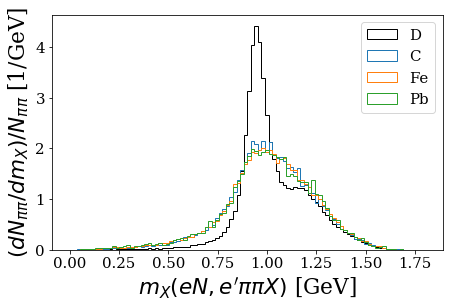

In [266]:
a = "D"
#masses = {"D":1.875612942, "C":11.18, "Fe":52.1030644, "Pb":193.729025}
colors="k tab:blue tab:orange tab:green".split()
for j,a in enumerate("D C Fe Pb".split()):
    df = dfs_data[a+"_2pi"]
    expr="sqrt((Eb+mp-h1_E-h2_E-e_p)**2-(e_px+h1_px+h2_px)**2-(e_py+h1_py+h2_py)**2-(Eb-e_pz-h1_pz-h2_pz)**2)"
    expr = expr.replace("mp", ".9383")
    expr = expr.replace("_E", "_z*nu")
    expr = expr.replace("Eb", "5.014")
    for i in 1,2:
        expr = expr.replace(f"h{i}_px", f"h{i}_p*sin(h{i}_th*{np.pi/180})*cos(h{i}_ph*{np.pi/180})")
        expr = expr.replace(f"h{i}_py", f"h{i}_p*sin(h{i}_th*{np.pi/180})*sin(h{i}_ph*{np.pi/180})")
        expr = expr.replace(f"h{i}_pz", f"h{i}_p*cos(h{i}_th*{np.pi/180})")
    plt.hist(df.eval(expr),bins=np.linspace(-0, 1.8,101), color=colors[j], 
             label=a, histtype='step', density=True)
plt.legend()
plt.xlabel("$m_X(eN,e'\pi\pi X)$ [GeV]")
plt.ylabel("$(dN_{\pi\pi}/dm_X)/N_{\pi\pi}$ [1/GeV]")
plt.savefig("images/missing_mass_epipi.png")

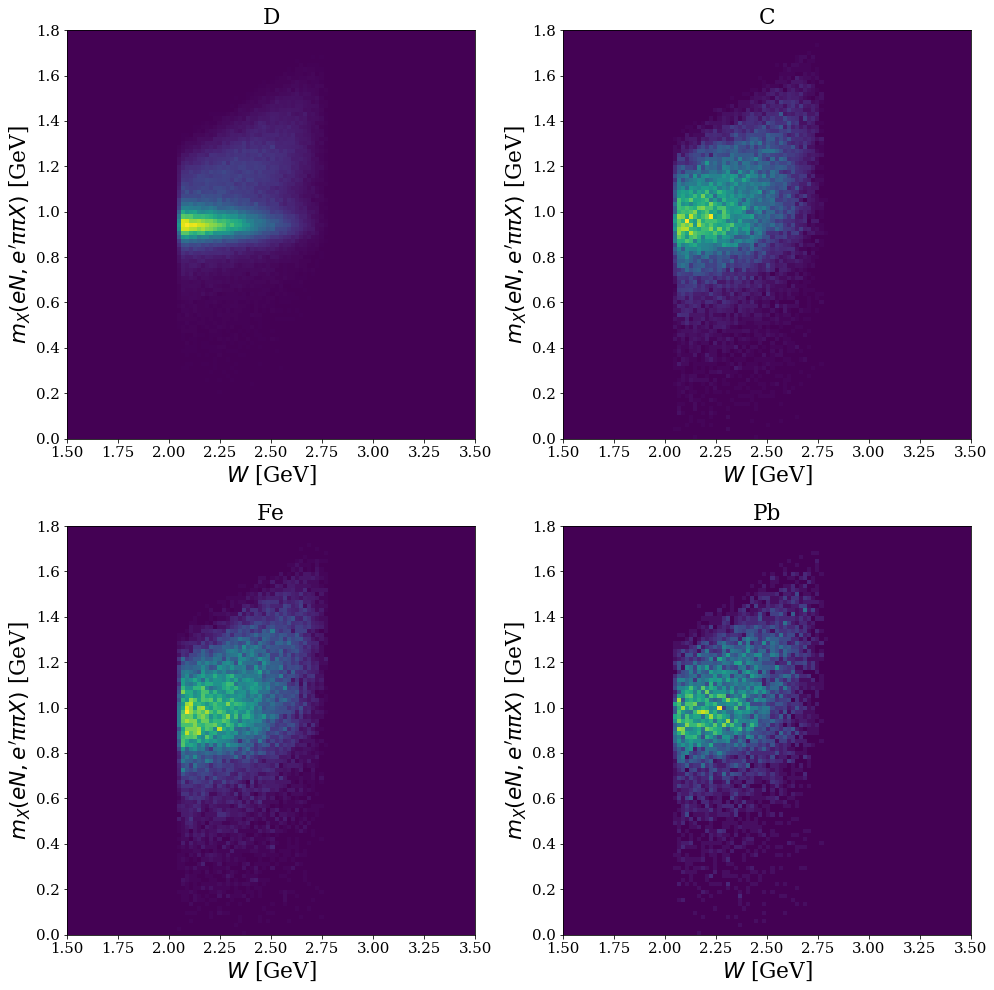

In [275]:
fig, axs = plt.subplots(2,2, figsize=(14,14))
a = "D"
#masses = {"D":1.875612942, "C":11.18, "Fe":52.1030644, "Pb":193.729025}
colors="k tab:blue tab:orange tab:green".split()
for j,a in enumerate("D C Fe Pb".split()):
    df = dfs_data[a+"_2pi"]
    expr="sqrt((Eb+mp-h1_E-h2_E-e_p)**2-(e_px+h1_px+h2_px)**2-(e_py+h1_py+h2_py)**2-(Eb-e_pz-h1_pz-h2_pz)**2)"
    expr = expr.replace("mp", ".9383")
    expr = expr.replace("_E", "_z*nu")
    expr = expr.replace("Eb", "5.014")
    plt.sca( axs[j//2][j%2])
    for i in 1,2:
        expr = expr.replace(f"h{i}_px", f"h{i}_p*sin(h{i}_th*{np.pi/180})*cos(h{i}_ph*{np.pi/180})")
        expr = expr.replace(f"h{i}_py", f"h{i}_p*sin(h{i}_th*{np.pi/180})*sin(h{i}_ph*{np.pi/180})")
        expr = expr.replace(f"h{i}_pz", f"h{i}_p*cos(h{i}_th*{np.pi/180})")
    plt.hist2d(df.W,df.eval(expr),bins=100, range=((1.5, 3.5),(-0, 1.8)), 
             label=a)
    axs[j//2][j%2].set_title(a)
    plt.ylabel("$m_X(eN,e'\pi\pi X)$ [GeV]")
    plt.xlabel("$W$ [GeV]")
#plt.legend()
plt.tight_layout()
plt.savefig("images/missing_mass_epipi_vs_W.png")

0.08353929807217005
0.38443565780014377
0.5563549160671463
0.5771122038444345


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Warning in <TH1F::Rebin>: ngroup=3 is not an exact divider of nbins=100.
Warning in <TH1F::Rebin>: ngroup=3 is not an exact divider of nbins=100.
Warning in <TH1F::Rebin>: ngroup=3 is not an exact divider of nbins=100.
Warning in <TH1F::Rebin>: ngroup=3 is not an exact divider of nbins=100.


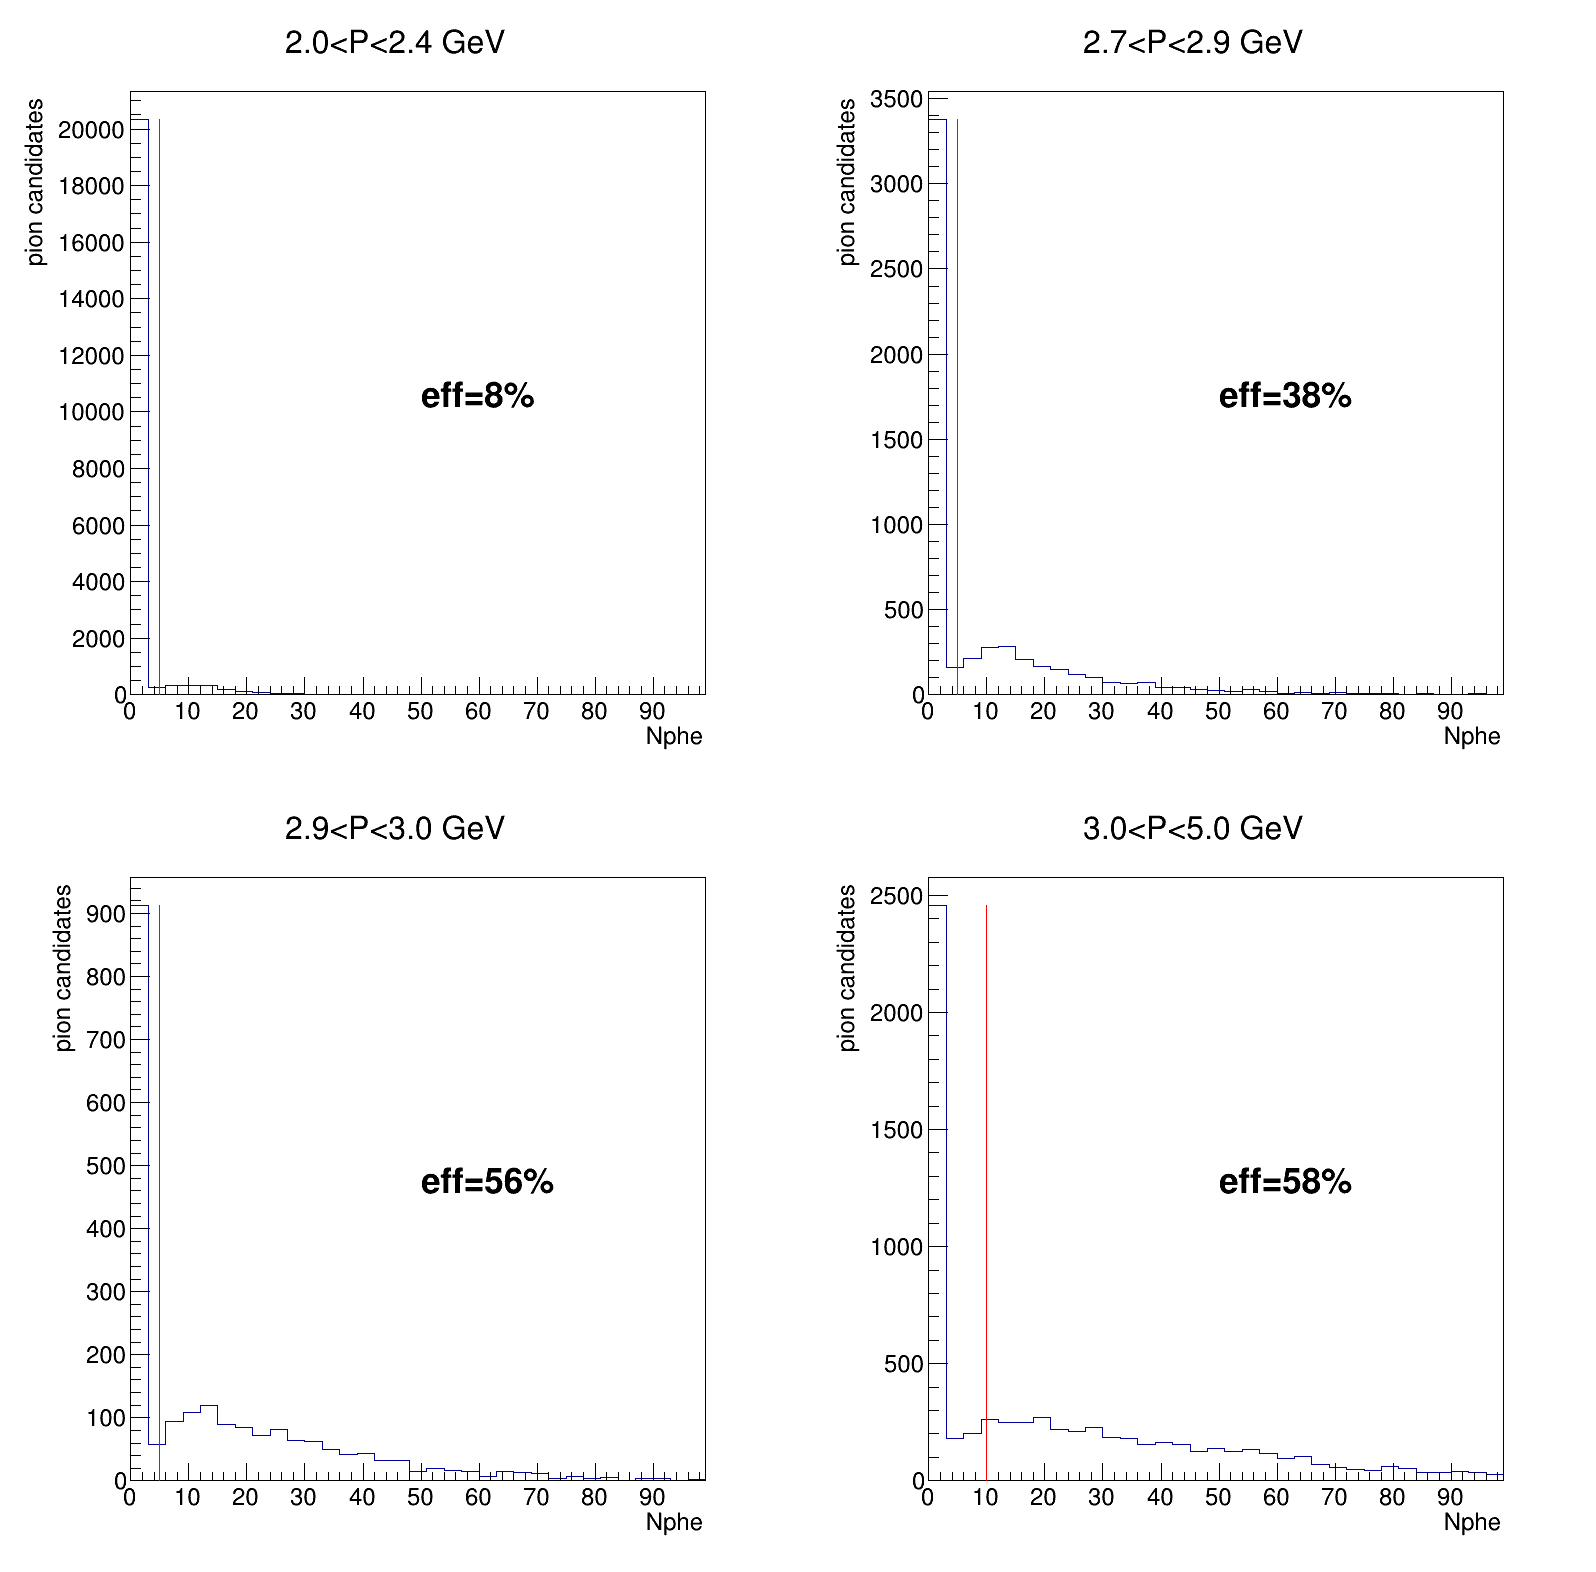

In [337]:
#f = ROOT.TFile("/home/sebouh/di-hadron/data/P27/pb/Pb.root")
f = ROOT.TFile("/home/sebouh/data_Pb_no_CCcut.root")
t = f.Get("ntuple_data")
c1 = ROOT.TCanvas("c1", "c1",1600, 1600)
c1.Divide(2,2)
nphe_thresholds = 5,5,5,10
pranges= (2.0, 2.4), (2.7, 2.9), (2.9, 3.0), (3.0, 5.0)

l = ROOT.TLine()
text = ROOT.TText()
for i in range(4):
    c1.cd(i+1)
    q="pid==211 && ThetaLab>10 && ThetaLab<120  "
    t.Draw(f"Nphe*(Nphe>=0)>>h{i}(100, 0, 100)", q+f" && P>{pranges[i][0]} && P<{pranges[i][1]}","", 
           10000000)
    h = t.GetHistogram()
    h.SetTitle(f"{pranges[i][0]}<P<{pranges[i][1]} GeV; Nphe; pion candidates")
    eff = sum([h.GetBinContent(i) for i in range(nphe_thresholds[i], 100)])/sum([h.GetBinContent(i) for i in range(0, 100)])
    h.Rebin(3)
    print(eff)
    ROOT.gPad.SetLeftMargin(0.15)
    l.SetLineColor(ROOT.kRed)
    l.DrawLine(nphe_thresholds[i],0,nphe_thresholds[i], h.GetMaximum())
    
    text.DrawText(50, h.GetMaximum()/2,f"eff={eff*100:.0f}%")
    #eff = t.GetEntries(q+f" && P>{pranges[i][0]} && P<{pranges[i][0]} && Nphe>{nphe_thresholds[i]}")/\
    #      t.GetEntries(q+f" && P>{pranges[i][0]} && P<{pranges[i][0]} && Nphe>0.01")
c1.Draw()
#for "2.0<h1_p<2.4", "2.0$<p<$2.4 GeV"),
#                    ("h1_p>2.7 and h1_p<2.9", "2.7<$p$<2.9 GeV"),
#                    ("h1_p>2.9 and h1_p<2.99", "2.9<$p$<2.99 GeV"),
#                    ("h1_p>2.99", "$p$>2.99 GeV"))):

In [333]:
for a in "D C Fe Pb".split():
    df = dfs_data[f'{a}_2pi']
    print(a, len(df.query("h2_th>25 and h2_th<30 and h2_p<700  and h2_pid==-211"))/len(df))

D 0.0707484150533653
C 0.06650151212920662
Fe 0.06882835868389232
Pb 0.06449221645663454


Starting election on dipion variables
This is Data
1.0< Q2 <4.0 455159  (100.00  %)
2.2 < nu < 4.2 455159  (100.00  %)
secondary hadrons are pions 270799  (59.50  %)
(h1_pid*h2_pid)<0, opposite charge pions 270598  (99.93  %)
kinematic limits for h2_z 265395  (98.08  %)
kinematic limits for dphi 265086  (99.88  %)
kinematic limits for pair_mass 255363  (96.33  %)
leading hadrons are pions 255363  (100.00  %)
0.2<h2_p<5.0 254937  (99.83  %)
0.2<h1_p<5.0 254937  (100.00  %)
25 degree separation between pion and electron.  This is a dumb cut 254937  (100.00  %)
10<h2_th 254892  (99.98  %)
Theta/P fiducial region selected for secondary hadron 241996  (94.94  %)
10< h1_th 241996  (100.00  %)
Theta/P fiducial region selected for trigger hadron 241996  (100.00  %)
Entries before cut  105846
Q2>1.0 and Q2<4.0 105846  (100.00  %)
0.2<h1_p<5.0  105846  (100.00  %)
inelasticity < 0.85 105846  (100.00  %)
h1_pid = pions (trigger) 105846  (100.00  %)
2.2 < nu <4.2 105846  (100.00  %)
25 degree sepa

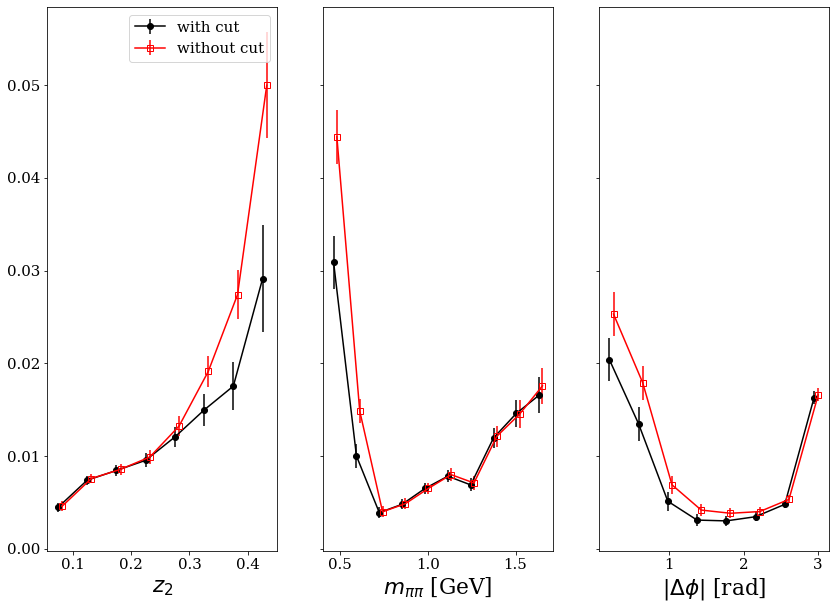

In [376]:
df= R2h_module.applyCuts(R2h_module.applyCutsPair(dfs_mc["D_2pi"],nomCuts=False).query(R2h_module.pair_cut_nom.replace('and (h1_p+h2_p)/nu<1.0', " ")))
df=df.query("h1_truth_pid>-9999 & h2_truth_pid>-9999")
df.query('pass_recon!=0 and h1_pid*h2_pid<0')

mass_expr = "(abs(h2_truth_pid)==2212)*.9383+(abs(h2_truth_pid)==321)*.493677+(abs(h2_truth_pid)==211)*.1396"
df.eval(f'h2_truth_p = sqrt((h2_truth_z*nu_truth)**2-({mass_expr})**2)',inplace=True)
df.eval(f'h1_truth_p = sqrt((h1_truth_z*nu_truth)**2-({mass_expr.replace("h2","h1")})**2)',inplace=True)
#df = df.query("abs(h1_p/h1_truth_p-1)<.15 and abs(h2_p/h2_truth_p-1)<.15")



fig,axs= plt.subplots(1,3, figsize=(14,10),sharey='all')
for j,(xname, n, r) in enumerate(zip("h2_z pair_mass dphi".split(), (9, 11, 9),
                                         ((.05, .45), (.4, 1.7), (0, np.pi)))):
    tot_cut, xedge = np.histogram(df.query("h1_p+h2_p<nu").eval(xname), bins=np.linspace(*r,n))
    p_cut, xedge = np.histogram(df.query("(abs(h1_truth_pid) == 2212 | abs(h2_truth_pid)==2212) & h1_p+h2_p<nu").eval(xname), bins=np.linspace(*r,n))
    tot_nocut, xedge = np.histogram(df.eval(xname), bins=np.linspace(*r,n))
    p_nocut, xedge = np.histogram(df.query("(abs(h1_truth_pid) == 2212 | abs(h2_truth_pid)==2212)").eval(xname), bins=np.linspace(*r,n))
    
    x = (xedge[1:]+xedge[:-1])/2
    axs[j].errorbar(x, p_cut/tot_cut, np.sqrt((p_cut)*(tot_cut-p_cut)/tot_cut**3),color='k',
                                           label='with cut', marker='o')
    
    x = (xedge[1:]+xedge[:-1])/2+(x[1]-x[0])*1/7
    axs[j].errorbar(x, p_nocut/tot_nocut, np.sqrt((p_cut)*(tot_cut-p_cut)/tot_cut**3),color='r',
                                           fillstyle='none',label='without cut', marker='s')
    
 
axs[0].legend()
axs[0].set_xlabel("$z_2$")
axs[1].set_xlabel("$m_{\pi\pi}$ [GeV]")
axs[2].set_xlabel("$|\Delta\phi|$ [rad]")
plt.show()

(array([0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 3.1200e+02, 1.8030e+03,
        3.8240e+03, 5.7250e+03, 7.4630e+03, 9.0620e+03, 1.0407e+04,
        1.1584e+04, 1.2540e+04, 1.3242e+04, 1.3767e+04, 1.4213e+04,
        1.4534e+04, 1.4495e+04, 1.4481e+04, 1.4293e+04, 1.4063e+04,
        1.3960e+04, 1.3471e+04, 1.3215e+04, 1.2570e+04, 1.1515e+04,
        1.0295e+04, 8.4650e+03, 6.2240e+03, 3.5430e+03, 1.5790e+03,
        6.1300e+02, 2.7000e+02, 1.7500e+02, 1.6600e+02, 1.5500e+02,
        1.2800e+02, 1.3200e+02, 1.3500e+02, 1.1000e+02, 9.0000e+01,
        7.8000e+01, 4.7000e+01, 2.5000e+01, 2.3000e+01, 1.7000e+01,
        1.1000e+01, 8.0000e+00, 3.0000e+00, 6.0000e+00, 5.0000e+00,
        2.0000e+00, 1.0000e+00, 0.0000e+00, 0.00

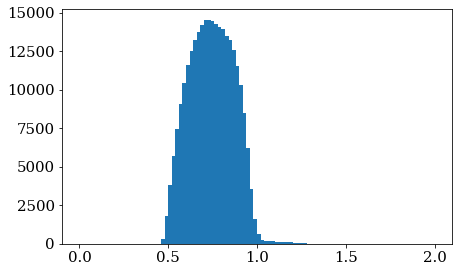

In [363]:
plt.hist(dfs_mc["D_2pi"].eval("h1_z+h2_z"),range=(0, 2), bins=100)